In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Loading dataset

In [3]:
data = pd.read_csv("C:/Users/prian/OneDrive/Desktop/32_Murder_victim_age_sex.csv")

In [4]:
data

,Area_Name,Year,Group_Name,Sub_Group_Name,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
0,Andaman & Nicobar Islands,2001,Murder - Female Victims,2. Female Victims,NaN,6,NaN,NaN,NaN,4.0,2.0
1,Andhra Pradesh,2001,Murder - Female Victims,2. Female Victims,67.0,607,15.0,38.0,43.0,269.0,175.0
2,Arunachal Pradesh,2001,Murder - Female Victims,2. Female Victims,2.0,16,0.0,0.0,0.0,10.0,4.0
3,Assam,2001,Murder - Female Victims,2. Female Victims,11.0,128,8.0,4.0,23.0,45.0,37.0
4,Bihar,2001,Murder - Female Victims,2. Female Victims,12.0,366,0.0,0.0,40.0,191.0,123.0
...,...,...,...,...,...,...,...,...,...,...,...
1013,Tamil Nadu,2010,Murder - Total Victims,3. Total,327.0,1908,13.0,63.0,16.0,650.0,839.0
1014,Tripura,2010,Murder - Total Victims,3. Total,24.0,159,2.0,0.0,0.0,60.0,73.0
1015,Uttar Pradesh,2010,Murder - Total Victims,3. Total,344.0,4456,82.0,138.0,126.0,2358.0,1408.0
1016,Uttarakhand,2010,Murder - Total Victims,3. Total,19.0,176,1.0,NaN,2.0,91.0,63.0


# knowing rows and columns

In [5]:
data.shape

(1018, 11)

# Information about dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area_Name               1018 non-null   object 
 1   Year                    1018 non-null   int64  
 2   Group_Name              1018 non-null   object 
 3   Sub_Group_Name          1018 non-null   object 
 4   Victims_Above_50_Yrs    962 non-null    float64
 5   Victims_Total           1018 non-null   int64  
 6   Victims_Upto_10_15_Yrs  876 non-null    float64
 7   Victims_Upto_10_Yrs     900 non-null    float64
 8   Victims_Upto_15_18_Yrs  888 non-null    float64
 9   Victims_Upto_18_30_Yrs  1009 non-null   float64
 10  Victims_Upto_30_50_Yrs  1007 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 87.6+ KB


# Data cleaning

In [7]:
data.isnull().sum()

Area_Name                   0
Year                        0
Group_Name                  0
Sub_Group_Name              0
Victims_Above_50_Yrs       56
Victims_Total               0
Victims_Upto_10_15_Yrs    142
Victims_Upto_10_Yrs       118
Victims_Upto_15_18_Yrs    130
Victims_Upto_18_30_Yrs      9
Victims_Upto_30_50_Yrs     11
dtype: int64

In [8]:
data['Victims_Above_50_Yrs'].fillna(data['Victims_Above_50_Yrs'].mean(), inplace=True)

In [9]:
data['Victims_Upto_10_15_Yrs'].fillna(data['Victims_Upto_10_15_Yrs'].median(), inplace=True)

In [10]:
data['Victims_Upto_10_Yrs'].fillna(0, inplace=True)

In [11]:
data['Victims_Upto_15_18_Yrs'].fillna(method='ffill', inplace=True)

In [12]:
data['Victims_Upto_30_50_Yrs'].fillna(method='bfill', inplace=True)

In [13]:
data.isnull().sum()

Area_Name                 0
Year                      0
Group_Name                0
Sub_Group_Name            0
Victims_Above_50_Yrs      0
Victims_Total             0
Victims_Upto_10_15_Yrs    0
Victims_Upto_10_Yrs       0
Victims_Upto_15_18_Yrs    1
Victims_Upto_18_30_Yrs    9
Victims_Upto_30_50_Yrs    0
dtype: int64

In [14]:
data['Victims_Upto_30_50_Yrs'].fillna(method='ffill', inplace=True)

In [15]:
data['Victims_Upto_15_18_Yrs'].fillna(method='bfill', inplace=True)

In [16]:
data.isnull().sum()

Area_Name                 0
Year                      0
Group_Name                0
Sub_Group_Name            0
Victims_Above_50_Yrs      0
Victims_Total             0
Victims_Upto_10_15_Yrs    0
Victims_Upto_10_Yrs       0
Victims_Upto_15_18_Yrs    0
Victims_Upto_18_30_Yrs    9
Victims_Upto_30_50_Yrs    0
dtype: int64

In [17]:
data['Victims_Upto_18_30_Yrs'].fillna(method='ffill', inplace=True)

In [18]:
data1=data.isnull().sum()

In [19]:
data1

Area_Name                 0
Year                      0
Group_Name                0
Sub_Group_Name            0
Victims_Above_50_Yrs      0
Victims_Total             0
Victims_Upto_10_15_Yrs    0
Victims_Upto_10_Yrs       0
Victims_Upto_15_18_Yrs    0
Victims_Upto_18_30_Yrs    0
Victims_Upto_30_50_Yrs    0
dtype: int64

In [20]:
data1.describe()

count    11.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
dtype: float64

In [21]:
data.describe()

,Year,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,2005.512770,67.559252,683.406680,8.485265,13.019646,16.974460,314.198428,272.630648
std,2.866127,97.840011,1015.595667,20.036846,24.300876,37.456121,481.819958,394.485133
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,3.250000,31.000000,0.000000,0.000000,1.000000,13.000000,13.000000
50%,2006.000000,29.000000,258.000000,2.000000,2.000000,4.000000,117.000000,102.000000
75%,2008.000000,82.000000,1011.750000,8.000000,15.000000,15.000000,417.500000,409.750000
max,2010.000000,824.000000,8180.000000,218.000000,189.000000,347.000000,3724.000000,3143.000000


In [22]:
data.columns

Index(['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name',
       'Victims_Above_50_Yrs', 'Victims_Total', 'Victims_Upto_10_15_Yrs',
       'Victims_Upto_10_Yrs', 'Victims_Upto_15_18_Yrs',
       'Victims_Upto_18_30_Yrs', 'Victims_Upto_30_50_Yrs'],
      dtype='object')

# select the relevant features

In [23]:
X = data[['Victims_Above_50_Yrs','Victims_Upto_10_15_Yrs','Victims_Upto_10_Yrs','Victims_Upto_15_18_Yrs','Victims_Upto_18_30_Yrs','Victims_Upto_30_50_Yrs']]

In [24]:
X

,Victims_Above_50_Yrs,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
0,67.559252,2.0,0.0,43.0,4.0,2.0
1,67.000000,15.0,38.0,43.0,269.0,175.0
2,2.000000,0.0,0.0,0.0,10.0,4.0
3,11.000000,8.0,4.0,23.0,45.0,37.0
4,12.000000,0.0,0.0,40.0,191.0,123.0
...,...,...,...,...,...,...
1013,327.000000,13.0,63.0,16.0,650.0,839.0
1014,24.000000,2.0,0.0,0.0,60.0,73.0
1015,344.000000,82.0,138.0,126.0,2358.0,1408.0
1016,19.000000,1.0,0.0,2.0,91.0,63.0


# Apply linear regression

In [25]:
X = data[['Victims_Upto_10_15_Yrs', 'Victims_Upto_15_18_Yrs', 'Victims_Upto_18_30_Yrs', 'Victims_Upto_30_50_Yrs']]
y = data['Victims_Total']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(X_test)

In [31]:
mse = mean_squared_error(y_test, y_pred)


# Data visualization

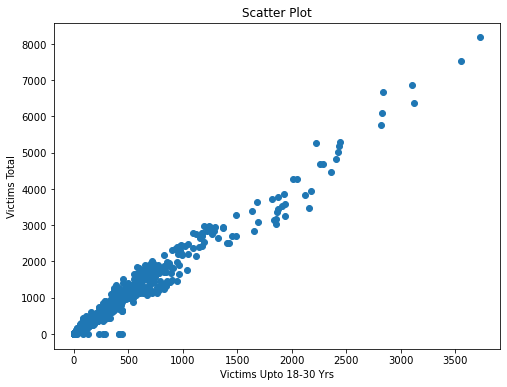

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Victims_Upto_18_30_Yrs'], data['Victims_Total'])
plt.xlabel('Victims Upto 18-30 Yrs')
plt.ylabel('Victims Total')
plt.title('Scatter Plot')
plt.show()

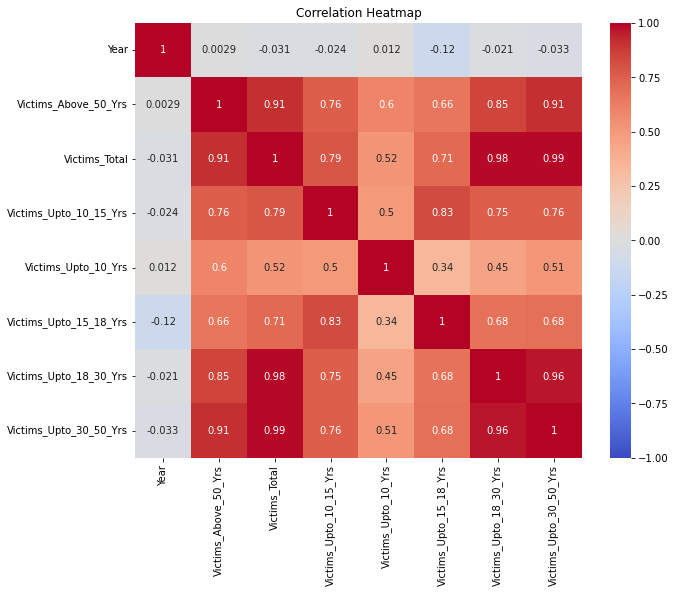

In [33]:
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Apply k means

In [34]:
from sklearn.cluster import KMeans

In [35]:
k_means = KMeans()
k_means.fit(X)

C:\Users\prian\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\prian\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\prian\anaconda3\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\prian\anaconda3\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\prian\anaconda3\lib\subprocess.py", line 1420, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


KMeans()

In [36]:
k_means = KMeans()
k_means.fit_predict(X)

array([3, 0, 3, ..., 2, 3, 7])

In [37]:
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

In [38]:
wcss

[396196176.6561887,
 155624069.58934456,
 68813063.39515598,
 42994006.31953059,
 30017325.836809345,
 21548649.02045018,
 18252630.26378172,
 15558078.012378478,
 12809368.613414207,
 11780386.259026315]

In [39]:
import matplotlib.pyplot as plt

# Apply elbow method

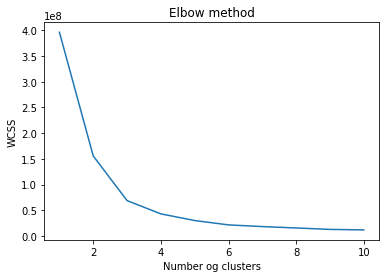

In [40]:
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("Number og clusters")
plt.ylabel("WCSS")
plt.show()
         

In [41]:
X = data[['Victims_Above_50_Yrs','Victims_Upto_10_15_Yrs','Victims_Upto_10_Yrs','Victims_Upto_15_18_Yrs','Victims_Upto_18_30_Yrs','Victims_Upto_30_50_Yrs']]

In [42]:
X

,Victims_Above_50_Yrs,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
0,67.559252,2.0,0.0,43.0,4.0,2.0
1,67.000000,15.0,38.0,43.0,269.0,175.0
2,2.000000,0.0,0.0,0.0,10.0,4.0
3,11.000000,8.0,4.0,23.0,45.0,37.0
4,12.000000,0.0,0.0,40.0,191.0,123.0
...,...,...,...,...,...,...
1013,327.000000,13.0,63.0,16.0,650.0,839.0
1014,24.000000,2.0,0.0,0.0,60.0,73.0
1015,344.000000,82.0,138.0,126.0,2358.0,1408.0
1016,19.000000,1.0,0.0,2.0,91.0,63.0


In [43]:
k_means = KMeans(n_clusters=3,random_state=42)
y_means = k_means.fit_predict(X)

In [44]:
y_means

array([1, 1, 1, ..., 2, 1, 0])

# Cluster visualization

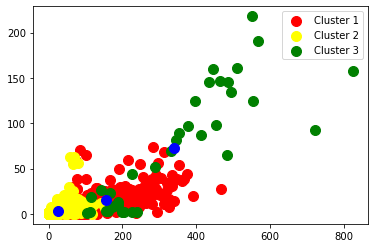

In [45]:
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1],s=100,c='red',label="Cluster 1")
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1],s=100,c='yellow',label="Cluster 2")
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1],s=100,c='green',label="Cluster 3")
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,c="blue")
plt.legend()

In [46]:
X = data[['Victims_Above_50_Yrs', 'Victims_Upto_10_15_Yrs', 'Victims_Upto_10_Yrs',
        'Victims_Upto_15_18_Yrs', 'Victims_Upto_18_30_Yrs', 'Victims_Upto_30_50_Yrs']]
y = data['Victims_Total']

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
cluster_models = {}

In [50]:
num_clusters = 3

In [52]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [53]:
data['Cluster'] = kmeans.labels_

In [54]:
print(data.head())

                   Area_Name  Year               Group_Name  \
0  Andaman & Nicobar Islands  2001  Murder - Female Victims   
1             Andhra Pradesh  2001  Murder - Female Victims   
2          Arunachal Pradesh  2001  Murder - Female Victims   
3                      Assam  2001  Murder - Female Victims   
4                      Bihar  2001  Murder - Female Victims   

      Sub_Group_Name  Victims_Above_50_Yrs  Victims_Total  \
0  2. Female Victims             67.559252              6   
1  2. Female Victims             67.000000            607   
2  2. Female Victims              2.000000             16   
3  2. Female Victims             11.000000            128   
4  2. Female Victims             12.000000            366   

   Victims_Upto_10_15_Yrs  Victims_Upto_10_Yrs  Victims_Upto_15_18_Yrs  \
0                     2.0                  0.0                    43.0   
1                    15.0                 38.0                    43.0   
2                     0.0       

In [55]:
from sklearn.preprocessing import StandardScaler

# Select the same features used for training

In [56]:
selected_features = ["Victims_Above_50_Yrs", "Victims_Upto_10_15_Yrs", "Victims_Upto_10_Yrs",
                     "Victims_Upto_15_18_Yrs", "Victims_Upto_18_30_Yrs", "Victims_Upto_30_50_Yrs"]


# Select the same features from new data

In [58]:
new_data_selected = data[selected_features]

# Load the trained scaler

In [59]:
scaler = StandardScaler()

# Fit the scaler from original data

In [60]:
X = data[selected_features]
X_scaled = scaler.fit_transform(X)

# Apply the same scaler to the new data

In [61]:
new_data_scaled = scaler.transform(new_data_selected)

# Load the k means model

In [62]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

# Predict clusters from the new data

In [63]:
predicted_clusters = kmeans.predict(new_data_scaled)

# Add predicted clusters to the new data

In [65]:
data['Predicted_Cluster'] = predicted_clusters

# Print the new data with predicted clusters

In [67]:
print(data.head())

                   Area_Name  Year               Group_Name  \
0  Andaman & Nicobar Islands  2001  Murder - Female Victims   
1             Andhra Pradesh  2001  Murder - Female Victims   
2          Arunachal Pradesh  2001  Murder - Female Victims   
3                      Assam  2001  Murder - Female Victims   
4                      Bihar  2001  Murder - Female Victims   

      Sub_Group_Name  Victims_Above_50_Yrs  Victims_Total  \
0  2. Female Victims             67.559252              6   
1  2. Female Victims             67.000000            607   
2  2. Female Victims              2.000000             16   
3  2. Female Victims             11.000000            128   
4  2. Female Victims             12.000000            366   

   Victims_Upto_10_15_Yrs  Victims_Upto_10_Yrs  Victims_Upto_15_18_Yrs  \
0                     2.0                  0.0                    43.0   
1                    15.0                 38.0                    43.0   
2                     0.0       